In [1]:
#importing the lib
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
#importing dataset
dataset=pd.read_csv("mnist_train.csv")
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#revoving class label from dataset
label=dataset['label']
d1=dataset.drop(columns=['label'])
d1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


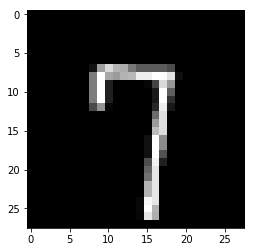

In [4]:
#ploting image of one sample
idx=50
plt.imshow(X=d1.iloc[idx].values.reshape(28,28),cmap='gray')

# reducing dataset d1 using TSNE

In [22]:
#standardization of d1 for tsne
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
standard_data=sc.fit_transform(d1)

print(standard_data.shape)

(42000, 784)


# 1st sample

In [9]:
#slicing of dataset of tsne
x=5000
d_5000=standard_data[:x,:]  #5000 data points
label_5000=label[:x]      #5000 data points

#reducing dataset d1 using TSNE
from sklearn.manifold import TSNE
model=TSNE(n_components=2,perplexity=30.0,random_state=0)
d_reduced=model.fit_transform(d_5000)
d_reduced.shape




(5000, 2)

# 2nd sample

In [19]:
#slicing of dataset of tsne
x=15000
d_15000=standard_data[:x,:]  #5000 data points
label_15000=label[:x]      #5000 data points

#reducing dataset d1 using TSNE
from sklearn.manifold import TSNE
model=TSNE(n_components=2,perplexity=30.0,random_state=0)
d_reduced2=model.fit_transform(d_15000)
d_reduced2.shape



(15000, 2)

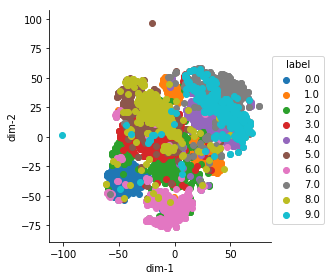

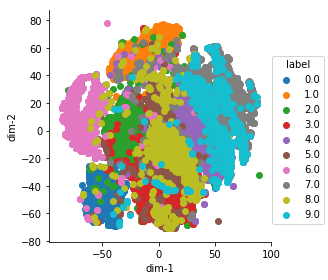

In [24]:

#joining class-label with dataset for visualization
d_viz=np.vstack((d_reduced.T,label[:5000])).T
d_df=pd.DataFrame(d_viz,columns=['dim-1','dim-2','label'])

d_viz2=np.vstack((d_reduced2.T,label_15000)).T
d_df2=pd.DataFrame(d_viz2,columns=['dim-1','dim-2','label'])


#for sample1
g0=sn.FacetGrid(data=d_df,hue='label',size=4).map(plt.scatter,'dim-1','dim-2').add_legend()

#for sample2
g1=sn.FacetGrid(data=d_df2,hue='label',size=4).map(plt.scatter,'dim-1','dim-2').add_legend()


# PCA

In [ ]:
from sklearn.decomposition import PCA
model=PCA(n_components=2)
data_pca=model.fit_transform(d1)
data_pca.shape

#joining class-label with dataset for visualization
d_viz=np.vstack((data_pca.T,label)).T
d_df=pd.DataFrame(d_viz,columns=['dim-1','dim-2','label'])


#visualizing the reduced data
sn.FacetGrid(data=d_df,hue='label',size=7).map(plt.scatter,'dim-1','dim-2').add_legend()

